In [1]:
import numpy as np
import quantities as pq
import elephant
from elephant.statistics import isi
#import vizi
#import misc
import matplotlib.pyplot as plt
import neo
import seaborn as sns
%matplotlib inline

/Users/astasik/anaconda3/envs/py27/lib/python2.7/site-packages/elephant/spade.py:82: UserWarning: fim.so not found in elephant/spade_src folder,you are using the python implementation of fast fca
  'you are using the python implementation of fast fca')


In [2]:
data1 = np.load('data/data1.npy')
data2 = np.load('data/data2.npy')
data3 = np.load('data/data3.npy')
data4 = np.load('data/data4.npy')
data5 = np.load('data/data5.npy')
data6 = np.load('data/data6.npy')

# print type(data1)
# print type(data1[0])
# print data5[0].annotations

In [3]:
# Define a useful function within a script like this:
def get_neuron_type(data, neuron_type):
    """
    Filters the data for a given neuron_type (exc or inh)
    Example use: data_exc, eIds = get_neuron_type(data1, 'exc')
    """
    ids = []
    for i in xrange(len(data)):
        if data[i].annotations['neuron_type']==neuron_type:
            ids.append(i)
    return data[ids], ids

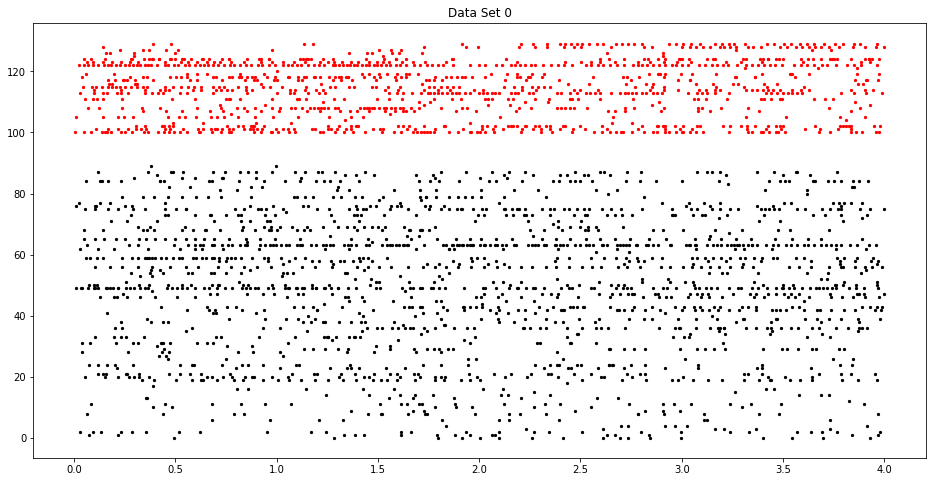

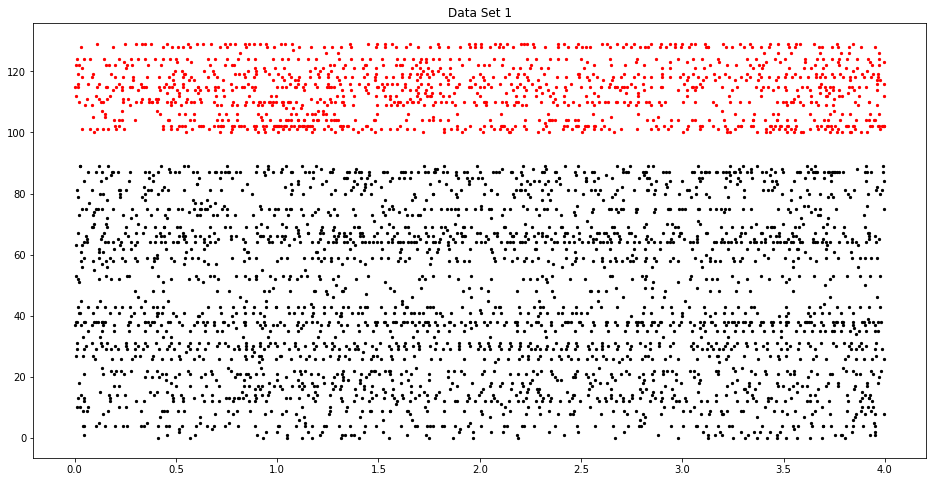

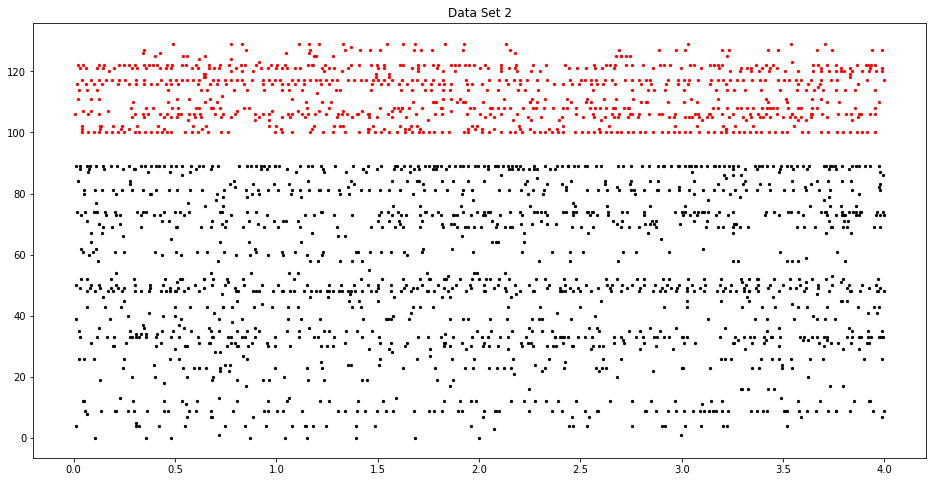

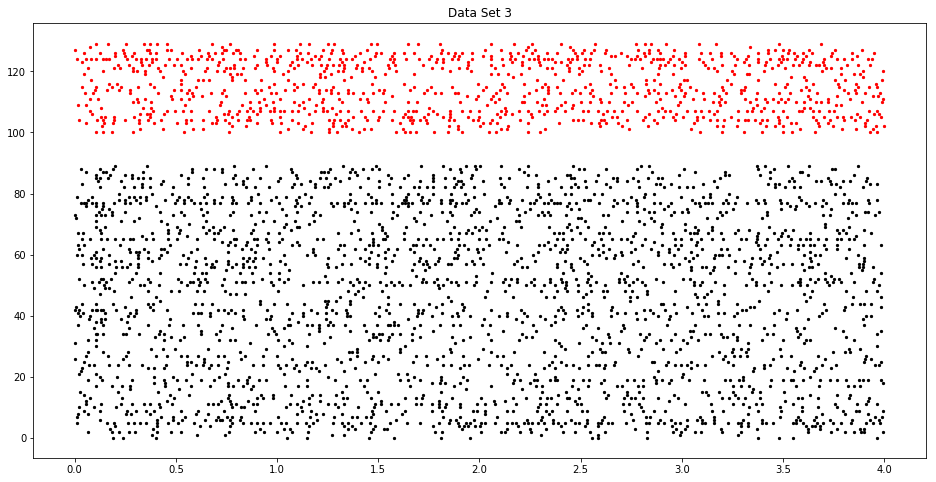

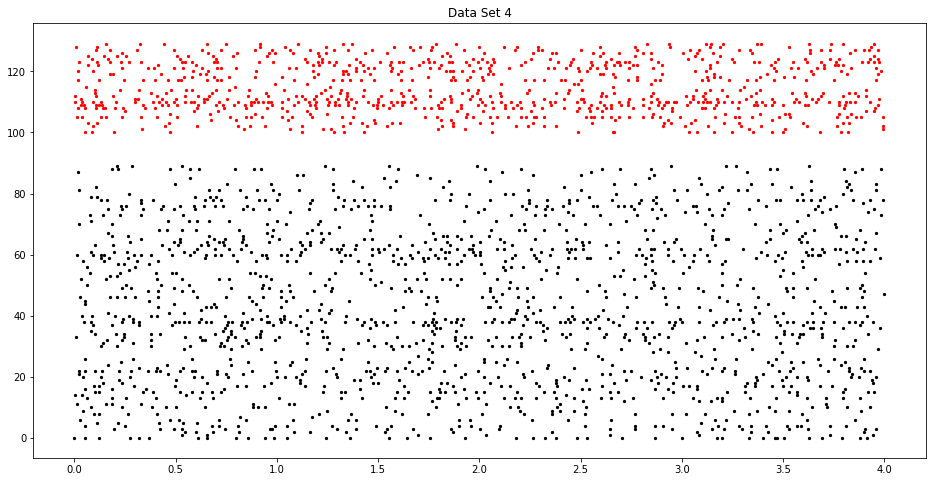

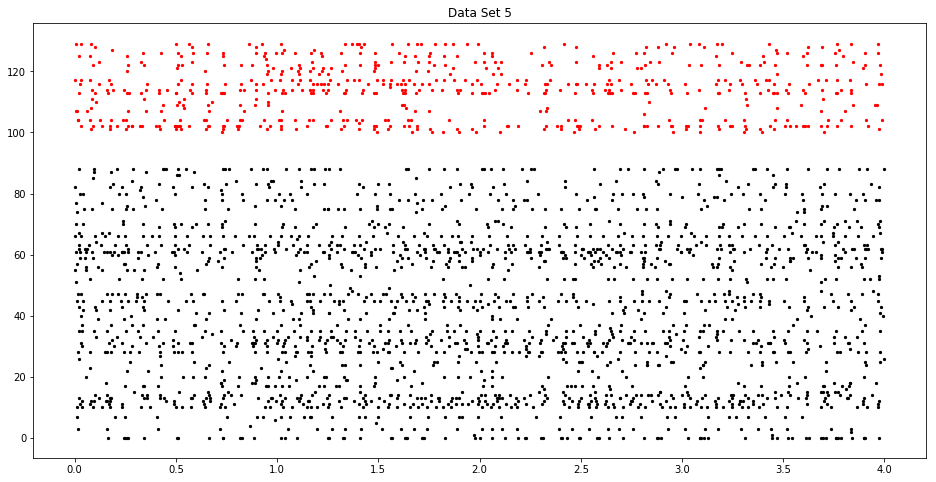

In [4]:
def PrintFunction(data, index):
    data_exc, eIds = get_neuron_type(data, 'exc')
    data_inh, iIds = get_neuron_type(data, 'inh')
    plt.figure(figsize=(16,8))
    counter_e=0
    counter_i=0
    for i in range(len(data)):
        mask = data[i]<4.
        if i in eIds:
            plt.scatter(data[i][mask], counter_e*np.ones_like(data[i][mask]), color='black', s=5.)
            counter_e+=1
        if i in iIds:
            plt.scatter(data[i][mask], (counter_i+100)*np.ones_like(data[i][mask]), color='red', s=5.)
            counter_i+=1
    plt.title('Data Set '+str(index))
    plt.show()

    
for index, d in enumerate([data1, data2, data3, data4, data5, data6]):
    PrintFunction(d, index)

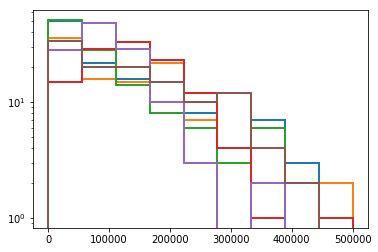

In [5]:

all_data = [data1, data2, data3, data4, data5, data6]
d = np.zeros((6, 120))

for i in range(len(all_data)):
    for j in range(120):
        d[i, j] = np.sum(all_data[i][j].magnitude)
        
bins = np.linspace(0, 500000, 10)
plt.figure()
for i in range(len(all_data)):
    plt.hist(d[i, :], bins=bins, histtype='step', lw=2)
plt.semilogy()
plt.show()

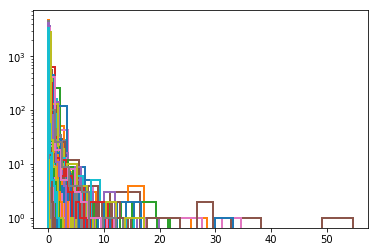

In [6]:
isi_data = dict()
for i, d in enumerate(data1):
    isi_data[i] = isi(d)
    
plt.figure()
bins=np.linspace(0, 10, 1000)
for i in isi_data.keys():
    plt.hist(isi_data[i].magnitude, histtype='step', lw=2)
plt.semilogy()
plt.show()

/Users/astasik/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


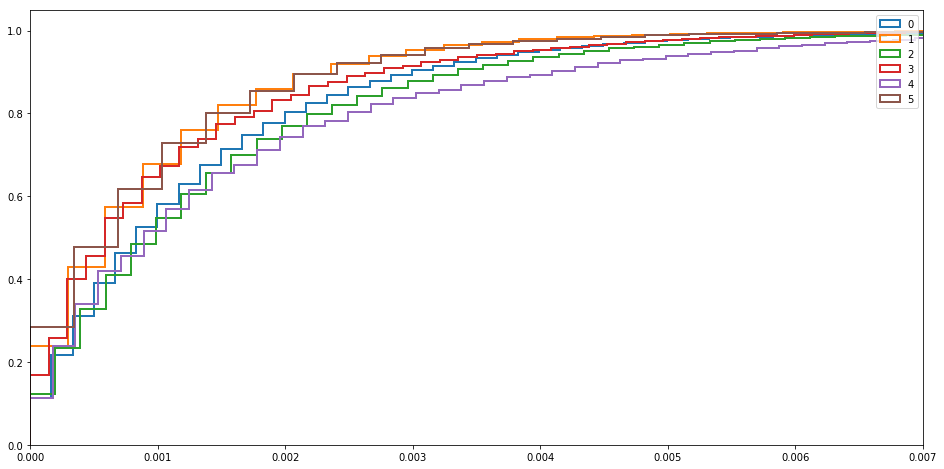

In [7]:
plt.figure(figsize=(16,8))

for label, a in enumerate(all_data):
    x = np.array([])
    for i, d in enumerate(a):
        x = np.append(x, d.magnitude)
    y = isi(x)
    plt.hist(y, bins=100, histtype='step', label=str(label), normed=True, lw=2, cumulative=True)
plt.legend()
# plt.semilogx()
# plt.semilogy()
plt.xlim(0, 0.007)
plt.show()

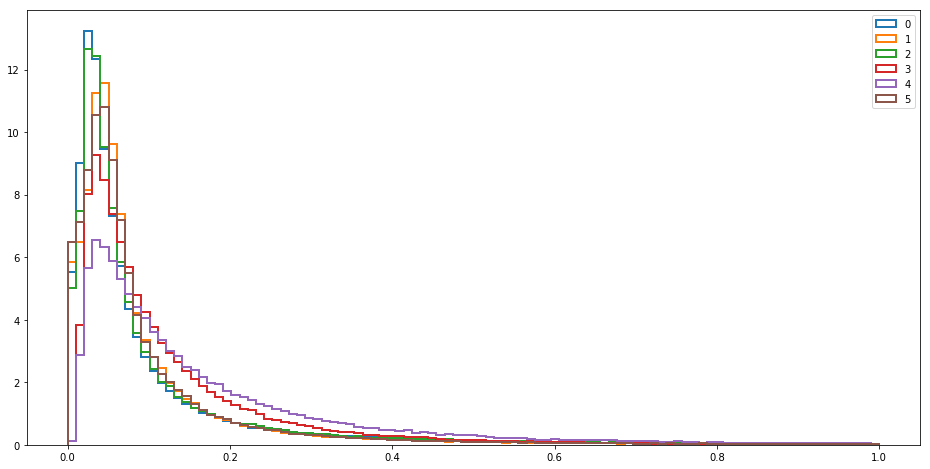

In [8]:
plt.figure(figsize=(16,8))

for label, a in enumerate(all_data):
    x = np.array([])
    for i, d in enumerate(a):
        x = np.append(x, isi(d).magnitude)
    y = x
    bins=np.linspace(0, 1, 100)
    plt.hist(y, bins=bins, histtype='step', label=str(label), normed=True, lw=2)
plt.legend()
# plt.semilogx()
# plt.semilogy()
# plt.xlim(0, 0.007)
plt.show()